# Enunciado

Realizar el ejercicio 3 de Naive Bayes y KNN con RandomForest.

# 1. Importación de datos   

In [46]:
import pandas as pd
df = pd.read_csv("csv/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
# Sustituimos los espacio por guiones bajos
df.columns = [x.replace(" ", "_") for x in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Preparación de los datos

In [49]:
X = df.drop("quality", axis=1)
y = df["quality"]

# 4. Visualización de la distribución de los datos

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


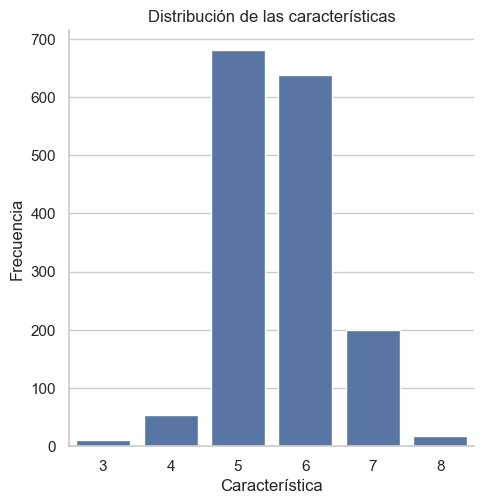

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df["quality"].groupby(df["quality"]).size())
sns.catplot(x="quality", kind="count", data=df)
plt.title('Distribución de las características')
plt.xlabel('Característica')
plt.ylabel('Frecuencia')
plt.show()

# 5. Preparación del conjunto de datos

In [52]:
from sklearn.model_selection import train_test_split

p_train = 0.7

train, test = train_test_split(df, train_size=p_train, random_state=42)

# inplace=True: Modifica el dataframe original en lugar de devolver uno nuevo
train.reset_index(inplace=True)
test.reset_index(inplace=True)

print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

print("Conjunto de entrenamiento:")
print(train.head())

print("Conjunto de prueba:")
print(test.head())

Train: (1119, 13)
Test: (480, 13)
Conjunto de entrenamiento:
   index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    925            8.6              0.22         0.36             1.9   
1    363           12.5              0.46         0.63             2.0   
2    906            7.2              0.54         0.27             2.6   
3    426            6.4              0.67         0.08             2.1   
4   1251            7.5              0.58         0.14             2.2   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.064                 53.0                  77.0  0.99604  3.47   
1      0.071                  6.0                  15.0  0.99880  2.99   
2      0.084                 12.0                  78.0  0.99640  3.39   
3      0.045                 19.0                  48.0  0.99490  3.49   
4      0.077                 27.0                  60.0  0.99630  3.28   

   sulphates  alcohol  quality  
0       0.87    

# 6. Parametrización

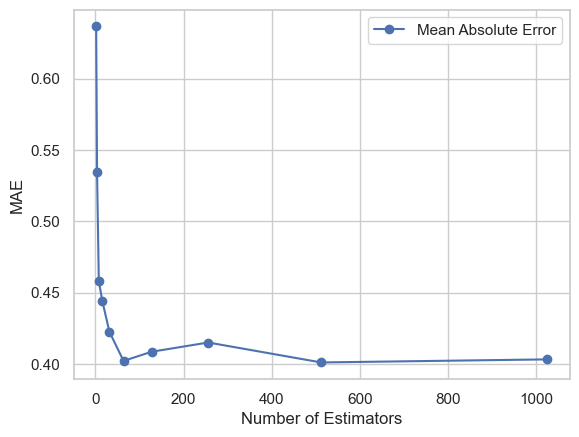

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

cv = TimeSeriesSplit()

l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

total_scores = []

for estimators in l_estimators:
    fold_errors = []  # fold_errors para modelo de clasificación, fold_accuracies para modelo de regresión
    classifier = RandomForestClassifier(n_estimators=estimators,
                                        criterion="entropy",
                                        random_state=42)
    for train_fold, test_fold in cv.split(train):
        
        # División train test aleatoria
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]
        
        # Entrenamiento y ejecución del modelo
        classifier.fit(X=f_train.drop(['quality'], axis=1),
                       y=f_train['quality'])
        y_pred = classifier.predict(X=f_test.drop(['quality'], axis=1))
        
        # Evaluación del modelo
        mae = mean_absolute_error(f_test['quality'], y_pred)
        fold_errors.append(mae)

    total_scores.append(sum(fold_errors) / len(fold_errors))

plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')
plt.xlabel('Number of Estimators')
plt.legend(['Mean Absolute Error'])
plt.show()

In [54]:
import numpy as np
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 512, MAE =   0.40)


# 7. Creación del modelo

In [55]:
classifier = RandomForestClassifier(n_estimators=best_est,
                                    criterion="entropy",
                                    random_state=42)

classifier.fit(X=train.drop(['quality'], axis=1),
                y=train['quality'])

y_pred = classifier.predict(X=test.drop(['quality'], axis=1))

In [56]:
mae = mean_absolute_error(test['quality'], y_pred)
print(f"Error: {mae}")

Error: 0.3625


# 8. Evaluación del modelo

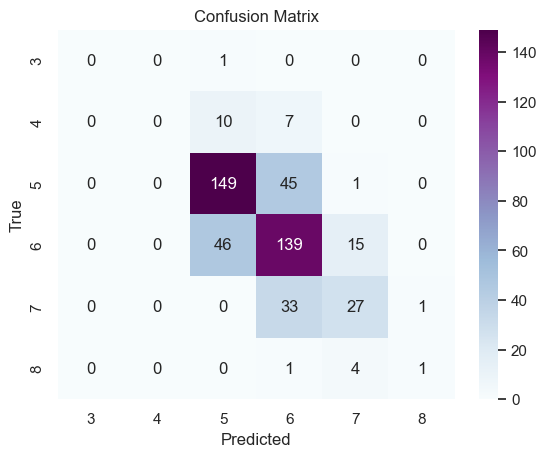

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test["quality"], y_pred)
classes = ['3', '4', '5', '6', '7', '8'] 
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()